<h1 style = "color:#080c80; font-size:40px;font-family: Sans-serif"><b>Introduction</b></h1>
<h2>Body mass index (BMI) is a tool that healthcare providers use to estimate the amount of body fat by using your height and weight measurements. It can help assess risk factors for certain health conditions. The BMI is not always an accurate representation of body fatness.</h2>

<h1 style = "color:#080c80; font-size:40px;font-family: Sans-serif"><b>Problem Statement</b></h1>
<h2>We have to predict BMI, given Gender, Height and Weight</h2>

<h1 style = "color:#080c80; font-size:40px;font-family: Sans-serif"><b>Importing Libraries</b></h1>

In [1]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
import xgboost
import math
from sklearn import metrics

<h1 style = "color:#080c80; font-size:40px;font-family: Sans-serif"><b>Importing Dataset</b></h1>

In [2]:
data = pd.read_csv("../input/bmidataset/bmi.csv")

<h1 style = "color:#080c80; font-size:40px;font-family: Sans-serif"><b>Basic Data Exploration</b></h1>

In [3]:
data.shape

(500, 4)

In [4]:
data.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


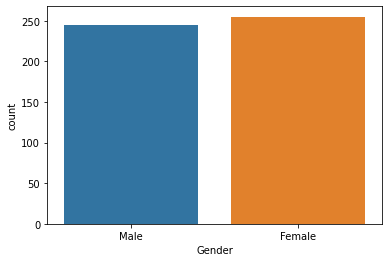

In [5]:
ax = sns.countplot(x = 'Gender', data = data)

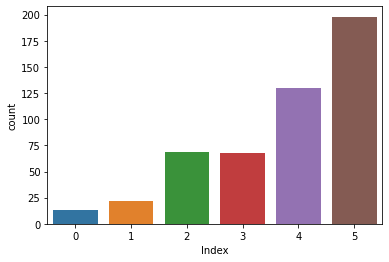

In [6]:
ax = sns.countplot(x = 'Index', data = data)

In [7]:
data.describe()

,Height,Weight,Index
count,500.000000,500.000000,500.000000
mean,169.944000,106.000000,3.748000
std,16.375261,32.382607,1.355053
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,170.500000,106.000000,4.000000
75%,184.000000,136.000000,5.000000
max,199.000000,160.000000,5.000000


In [8]:
data.isnull().sum()

Gender    0
Height    0
Weight    0
Index     0
dtype: int64

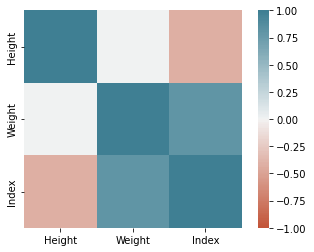

In [9]:
corr = data.corr()
ax = sns.heatmap(corr, vmin = -1, vmax = 1, center = 0, cmap = sns.diverging_palette(20, 220, n = 200), 
                square = True)

<h1 style = "color:#080c80; font-size:40px;font-family: Sans-serif"><b>Data Preprocessing</b></h1>

In [10]:
LE = LabelEncoder()
data['Gender'] = LE.fit_transform(data['Gender'])
data['Index'] = LE.fit_transform(data['Index'])

In [11]:
X = data.drop('Index',axis =1)
Y = data['Index']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3, random_state = 42)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(350, 3)
(350,)
(150, 3)
(150,)


<h1 style = "color:#080c80; font-size:40px;font-family: Sans-serif"><b>Model Building</b></h1>

In [12]:
KNN = KNeighborsClassifier(n_neighbors = 5)
LSVC = LinearSVC()
Tree = DecisionTreeClassifier(criterion = 'gini', max_depth = 3)
Forest = RandomForestClassifier(random_state = 1, max_features = 'sqrt', n_jobs = 1, verbose = 1)
XGB = XGBClassifier()
ADA = AdaBoostClassifier()
Naive = GaussianNB()
QDA = QuadraticDiscriminantAnalysis()

In [13]:
models = [KNN,LSVC,Tree,Forest,XGB,ADA,Naive,QDA]

In [14]:
models_scores =[]
for model in models:
    model.fit(X_train, Y_train)
    score = model.score(X_test, Y_test)
    models_scores.append(score)
mod_perfm = {}
D = models_scores
for key in models:
    for val in models_scores:
        mod_perfm[key] = val
        models_scores.remove(val)
        break
Keymax = max(mod_perfm, key= lambda x: mod_perfm[x])
print(Keymax, mod_perfm[Keymax])

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:45:14] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
QuadraticDiscriminantAnalysis() 0.8933333333333333


In [15]:
qda = QuadraticDiscriminantAnalysis()
%time qda.fit(X_train, Y_train)

CPU times: user 2.54 ms, sys: 897 µs, total: 3.43 ms
Wall time: 3.06 ms


QuadraticDiscriminantAnalysis()

<h1 style = "color:#080c80; font-size:40px;font-family: Sans-serif"><b>Evaluation</b></h1>

In [16]:
Y_pred = qda.predict(X_test)
print(Y_pred)

[4 2 3 4 4 5 5 5 3 5 4 5 2 5 5 3 5 5 3 5 2 5 1 4 4 5 5 5 5 2 4 5 4 4 4 2 5
 2 4 2 5 2 4 3 5 4 4 4 4 4 5 4 2 1 5 3 3 5 5 4 5 5 4 4 0 2 3 4 2 2 2 4 2 3
 5 5 5 4 2 5 5 3 2 5 4 5 3 5 4 3 1 2 5 4 5 2 5 4 1 5 4 4 5 5 3 3 4 5 4 5 3
 4 3 3 2 5 5 5 5 2 3 4 4 5 4 4 2 4 3 3 0 3 5 5 2 4 4 2 5 5 4 3 5 3 5 5 5 4
 5 4]


In [17]:
mse = metrics.mean_squared_error(Y_test, Y_pred)
print('Mean Squared Error : '+ str(mse))
rmse = math.sqrt(metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error : '+ str(rmse))

Mean Squared Error : 0.12666666666666668
Root Mean Squared Error : 0.3559026084010437


In [18]:
report = metrics.classification_report(Y_test, Y_pred)
print('Classification Report of Quadratic Discriminant Analysis : \n')
print(report)

Classification Report of Quadratic Discriminant Analysis : 

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.80      0.89         5
           2       1.00      0.82      0.90        28
           3       0.52      1.00      0.69        12
           4       0.91      0.85      0.88        46
           5       1.00      0.95      0.97        58

    accuracy                           0.89       150
   macro avg       0.82      0.90      0.83       150
weighted avg       0.93      0.89      0.90       150



In [19]:
qda.fit(X, Y)
pickle.dump(qda, open('quadratic_discriminant_analysis.pkl', 'wb'))

<h2>Thanks for Visiting</h2>